# Models Comparison for TinyML

In [2]:
# Load libraries
import numpy as np
from numpy import arange
import pickle

#
import matplotlib.pyplot as plt

#
import pandas as pd
from pandas import read_csv

from sklearn.metrics import confusion_matrix,  classification_report, f1_score
from sklearn.model_selection import train_test_split, KFold,StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline

from keras.models import Sequential, Model 
from keras.layers import Dense, Input, concatenate, Activation, Dropout
from keras.optimizers import Adam
from tensorflow.keras import layers

import tensorflow
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from micromlgen import port
import tinymlgen as tiny

import warnings
import sys
import seaborn as sbs

warnings.filterwarnings('ignore')

In [3]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tensorflow.random.set_seed(RANDOM_SEED)
np.set_printoptions(threshold=sys.maxsize)

## Change 'chosenIndex' to change the chosen Test (s/s3/s6)

In [4]:
dataXPath = ['../data/X.pkl', '../data/XS3.pkl', '../data/XS6.pkl']
dataYPath = ['../data/y.pkl', '../data/yS3.pkl', '../data/yS6.pkl']
choosenIndex = 0

with open(dataXPath[choosenIndex], 'rb') as f:
    X = pickle.load(f)

with open(dataYPath[choosenIndex], 'rb') as f:
    y = pickle.load(f)

In [5]:
print(np.unique(y))
labels = [str(el) for el in list(np.unique(y))]
print(labels)

[ 500 1000 1500 2000 2500 3000]
['500', '1000', '1500', '2000', '2500', '3000']


In [6]:
# Convert the labels in values like 0...n for the NN tests

labels = []
uniques = list(np.unique(y))

[labels.append(uniques.index(el)) for el in y]

y = np.array(labels)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_SEED)

In [8]:
print(X_test)

[[2395.05 2400.65 2394.6  2411.24 2402.3  2390.   2410.15 2395.96 2396.69
  2395.37 2390.87 2395.5  2402.05 2399.3  2402.44 2397.94 2399.98 2391.76
  2388.9  2403.18 2397.38 2397.71 2396.03 2394.26 2396.19 2387.79 2394.37
  2389.77 2398.23 2391.63 2392.47 2395.46]
 [1091.24 1096.13 1094.7  1112.59 1122.36 1109.67 1119.98 1122.88 1118.22
  1095.32 1094.03 1119.49 1087.38 1119.95 1096.46 1129.15 1122.41 1128.45
  1113.41 1096.33 1109.53 1116.76 1106.78 1100.36 1115.21 1125.87 1140.2
  1113.11 1109.69 1096.31 1100.79 1106.82]
 [5094.19 5082.99 5081.45 5086.32 5085.07 5106.41 5090.18 5079.33 5082.08
  5090.48 5083.94 5085.94 5081.88 5082.74 5086.73 5085.74 5091.27 5080.99
  5085.   5090.18 5078.64 5086.31 5083.7  5080.56 5086.45 5088.57 5079.9
  5082.86 5088.29 5082.68 5077.99 5085.53]
 [4406.56 4394.98 4393.69 4402.48 4394.4  4397.96 4410.17 4410.39 4401.04
  4409.05 4397.99 4396.82 4404.79 4398.43 4388.73 4402.91 4391.82 4395.11
  4399.56 4394.37 4391.2  4394.05 4397.61 4387.81 4384.16 4

## Model Spotting

In [9]:
# Test options and evaluation metric
num_folds = 10
seed = 42
scoring = 'f1_macro'


In [27]:
# Spot-Check Algorithms
models = []

#models.append(('XGB', XGBClassifier(random_state=seed)))
models.append(('GNB', GaussianNB(var_smoothing=2e-9)))
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('CART' , DecisionTreeClassifier(random_state=seed)))
models.append(('SVC' , SVC(gamma=0.00001, random_state=seed)))
models.append(('RF', RandomForestClassifier(random_state=seed, n_estimators = 50)))


In [28]:
results = []
names = []
for name, model in models:
    # Dividere dati in n = num_folds
    kf = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = np.array([])
    for train_idx, test_idx, in kf.split(X_train, y_train):
        X_cross_train, y_cross_train = X_train[train_idx], y_train[train_idx]
        X_cross_test, y_cross_test = X_train[test_idx], y_train[test_idx]
        model.fit(X_cross_train, y_cross_train)  
        y_pred = model.predict(X_cross_test)
        f1s = f1_score(y_cross_test, y_pred, average="weighted")
        cv_results = np.append(cv_results, [f1s])
    results.append(cv_results)
    names.append(name)
    #msg = "%s - %f - %f" % (name, cv_results.mean(), cv_results.std())
    msg = "{} - {:.2f} {:.2f}".format(name, cv_results.mean(), cv_results.std()).replace('.', ',')
    print(msg)

GNB - 0,99 0,01
LR - 0,17 0,06
CART - 0,99 0,01
SVC - 0,99 0,01
RF - 1,00 0,01


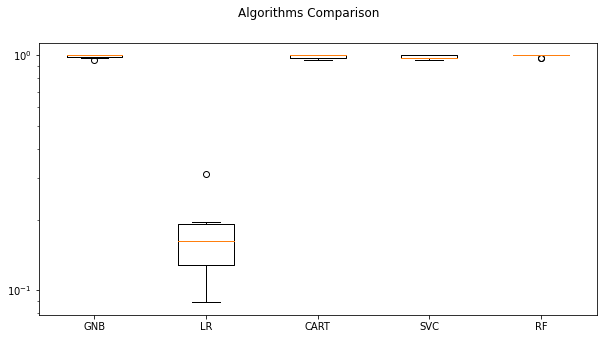

In [29]:
# Compare Algorithms
fig = plt.figure(figsize=(10,5))
fig.suptitle('Algorithms Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_yscale('log')
ax.set_xticklabels(names)
plt.show()

# Valutazione dei modelli sul Test Set

In [30]:
tasks = ['S', 'S3', 'S6']
def classification_report_csv(report, model_name):
    report_data = []
    lines = report.split('\n')
    index = 0
    row = lines[-4].split('    ')
    accuracy = row[-2]
    for line in lines[2:-5]:
        row = {}
        row_data = line.split('      ')
        row['class'] = uniques[index]
        row['precision'] = float(row_data[2]) 
        row['recall'] = float(row_data[3]) 
        row['f1_score'] = float(row_data[4])
        row['accuracy'] = accuracy
        report_data.append(row)
        index += 1
    dataframe = pd.DataFrame.from_dict(report_data)
    dataframe.to_csv(tasks[choosenIndex]+ '/classificationReports/'+'classification_report' + model_name +  '.csv', index = False)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_SEED)
for name, model in models:
    model.fit(X_train,  y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print(f"Model {name}: ")
    report = classification_report(y_test, pred_test)
    print(report)
    classification_report_csv(report, name)
    print("-------------------------------------------------------------")

Model GNB: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      0.95      0.97        20
           5       0.95      1.00      0.98        20

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

-------------------------------------------------------------
Model LR: 
              precision    recall  f1-score   support

           0       0.67      0.10      0.17        20
           1       0.50      0.05      0.09        20
           2       0.00      0.00      0.00        20
           3       0.19      0.25      0.22        20
           4       0.07      0.10      0.08        20
           5       0.14      0.40      0.20    

# Valutazione Inferance Rate medio (|X_test| = 50/50/100)

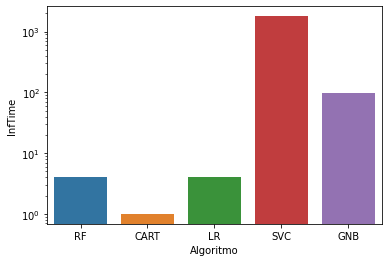

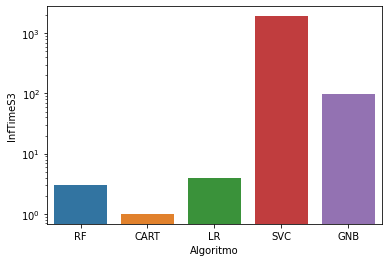

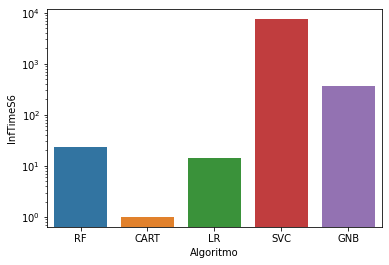

In [31]:
columns = ['InfTime', 'InfTimeS3', 'InfTimeS6']
for c in columns:
    csv = read_csv("InfTimeReport.csv")
    g = sbs.barplot(x=csv['Algoritmo'], y=csv[c])
    g.set_yscale("log")
    plt.ylabel(c)
    plt.show()


# Memoria occupata

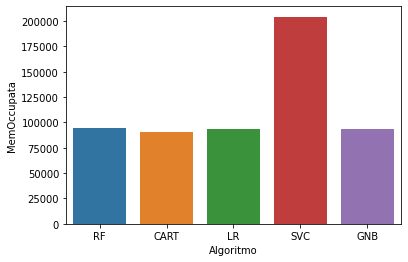

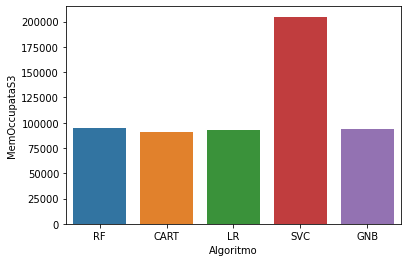

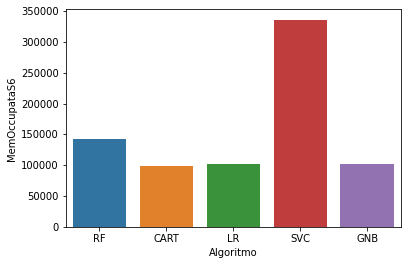

In [32]:
columns = ['MemOccupata', 'MemOccupataS3', 'MemOccupataS6']
for c in columns:   
    csv = read_csv("MemOccupationReport.csv")
    g = sbs.barplot(x=csv['Algoritmo'], y=csv[c])
    plt.ylabel(c)
    plt.show()

# Neural Network

In [17]:
def getNetwork(): 
    n = 100
    model = Sequential(name="Sequential-NN")
    model.add(layers.Dense(X.shape[1], activation='relu', input_shape=(X.shape[1],)))
    model.add(layers.Dense(np.unique(y).size * n, activation='relu'))
    model.add(layers.Dense(np.unique(y).size, activation='softmax'))
    learn_rate = 0.001
    opt = Adam(learning_rate=learn_rate)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

# Cross-Validation NN

In [18]:
EPOCHS = 500
BATCH_SIZE = 8
num_folds = 10


kf = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
cv_results = np.array([])
for train_idx, test_idx, in kf.split(X_train, y_train):
    X_cross_train, y_cross_train = X_train[train_idx], y_train[train_idx]
    X_cross_test, y_cross_test = X_train[test_idx], y_train[test_idx]
    model = getNetwork()
    model.fit(X_cross_train, y_cross_train, epochs=EPOCHS, batch_size=BATCH_SIZE)  
    y_pred = model.predict(X_cross_test)
    predictions_categorical = np.argmax(y_pred, axis=1)
    f1s = f1_score(y_cross_test, predictions_categorical, average="weighted")
    cv_results = np.append(cv_results, [f1s])

print(f'Average score of Cross Validation: {cv_results.mean()}')

Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 600)               19800     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 3606      
Total params: 24,462
Trainable params: 24,462
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
54/54 [==============================] - 0s 418us/step - loss: 185.4486 - accuracy: 0.1458
Epoch 2/500
54/54 [==============================] - 0s 382us/step - loss: 69.8279 - accuracy: 0.1620
Epoch 3/500
54/54 [==============================] - 0s 388us/step - loss: 16.0829 - accuracy: 0.1921
Epoch 4/500
54/54 [==============================] - 0s 378us/step - los

Epoch 74/500
54/54 [==============================] - 0s 388us/step - loss: 1.2029 - accuracy: 0.4514
Epoch 75/500
54/54 [==============================] - 0s 368us/step - loss: 1.2061 - accuracy: 0.4606
Epoch 76/500
54/54 [==============================] - 0s 384us/step - loss: 1.1725 - accuracy: 0.4514
Epoch 77/500
54/54 [==============================] - 0s 379us/step - loss: 1.0954 - accuracy: 0.5000
Epoch 78/500
54/54 [==============================] - 0s 369us/step - loss: 1.0847 - accuracy: 0.4838
Epoch 79/500
54/54 [==============================] - 0s 390us/step - loss: 1.0735 - accuracy: 0.5208
Epoch 80/500
54/54 [==============================] - 0s 370us/step - loss: 1.1157 - accuracy: 0.4699
Epoch 81/500
54/54 [==============================] - 0s 369us/step - loss: 1.0603 - accuracy: 0.4907
Epoch 82/500
54/54 [==============================] - 0s 373us/step - loss: 1.0742 - accuracy: 0.4838
Epoch 83/500
54/54 [==============================] - 0s 377us/step - loss: 1.0333

54/54 [==============================] - 0s 394us/step - loss: 1.0623 - accuracy: 0.4954
Epoch 154/500
54/54 [==============================] - 0s 399us/step - loss: 1.2495 - accuracy: 0.4931
Epoch 155/500
54/54 [==============================] - 0s 376us/step - loss: 1.0837 - accuracy: 0.5671
Epoch 156/500
54/54 [==============================] - 0s 378us/step - loss: 1.0190 - accuracy: 0.5579
Epoch 157/500
54/54 [==============================] - 0s 378us/step - loss: 0.9250 - accuracy: 0.5556
Epoch 158/500
54/54 [==============================] - 0s 388us/step - loss: 1.0508 - accuracy: 0.5231
Epoch 159/500
54/54 [==============================] - 0s 366us/step - loss: 0.9336 - accuracy: 0.5532
Epoch 160/500
54/54 [==============================] - 0s 370us/step - loss: 1.2729 - accuracy: 0.4491
Epoch 161/500
54/54 [==============================] - 0s 382us/step - loss: 0.9479 - accuracy: 0.5579
Epoch 162/500
54/54 [==============================] - 0s 369us/step - loss: 0.9552 - a

54/54 [==============================] - 0s 383us/step - loss: 0.6677 - accuracy: 0.7106
Epoch 233/500
54/54 [==============================] - 0s 391us/step - loss: 0.7005 - accuracy: 0.6852
Epoch 234/500
54/54 [==============================] - 0s 378us/step - loss: 0.7268 - accuracy: 0.6528
Epoch 235/500
54/54 [==============================] - 0s 394us/step - loss: 0.6149 - accuracy: 0.7384
Epoch 236/500
54/54 [==============================] - 0s 417us/step - loss: 0.7230 - accuracy: 0.6829
Epoch 237/500
54/54 [==============================] - 0s 370us/step - loss: 0.7075 - accuracy: 0.6597
Epoch 238/500
54/54 [==============================] - 0s 392us/step - loss: 0.6414 - accuracy: 0.7199
Epoch 239/500
54/54 [==============================] - 0s 389us/step - loss: 0.8812 - accuracy: 0.6065
Epoch 240/500
54/54 [==============================] - 0s 372us/step - loss: 0.6319 - accuracy: 0.7176
Epoch 241/500
54/54 [==============================] - 0s 402us/step - loss: 0.7204 - a

54/54 [==============================] - 0s 353us/step - loss: 0.5966 - accuracy: 0.7060
Epoch 312/500
54/54 [==============================] - 0s 347us/step - loss: 0.5695 - accuracy: 0.7338
Epoch 313/500
54/54 [==============================] - 0s 346us/step - loss: 0.4757 - accuracy: 0.7685
Epoch 314/500
54/54 [==============================] - 0s 347us/step - loss: 0.5336 - accuracy: 0.7199
Epoch 315/500
54/54 [==============================] - 0s 351us/step - loss: 0.4865 - accuracy: 0.7685
Epoch 316/500
54/54 [==============================] - 0s 352us/step - loss: 0.5740 - accuracy: 0.7546
Epoch 317/500
54/54 [==============================] - 0s 349us/step - loss: 0.4563 - accuracy: 0.7963
Epoch 318/500
54/54 [==============================] - 0s 346us/step - loss: 0.4301 - accuracy: 0.8472
Epoch 319/500
54/54 [==============================] - 0s 352us/step - loss: 0.5323 - accuracy: 0.7708
Epoch 320/500
54/54 [==============================] - 0s 348us/step - loss: 0.4997 - a

54/54 [==============================] - 0s 353us/step - loss: 0.4258 - accuracy: 0.8056
Epoch 391/500
54/54 [==============================] - 0s 355us/step - loss: 0.4218 - accuracy: 0.7963
Epoch 392/500
54/54 [==============================] - 0s 356us/step - loss: 0.3798 - accuracy: 0.8472
Epoch 393/500
54/54 [==============================] - 0s 367us/step - loss: 0.3557 - accuracy: 0.8449
Epoch 394/500
54/54 [==============================] - 0s 347us/step - loss: 0.4864 - accuracy: 0.7731
Epoch 395/500
54/54 [==============================] - 0s 354us/step - loss: 0.4889 - accuracy: 0.7315
Epoch 396/500
54/54 [==============================] - 0s 350us/step - loss: 0.4147 - accuracy: 0.7940
Epoch 397/500
54/54 [==============================] - 0s 349us/step - loss: 0.4079 - accuracy: 0.8032
Epoch 398/500
54/54 [==============================] - 0s 347us/step - loss: 0.5072 - accuracy: 0.7824
Epoch 399/500
54/54 [==============================] - 0s 346us/step - loss: 0.5259 - a

54/54 [==============================] - 0s 358us/step - loss: 0.3842 - accuracy: 0.8426
Epoch 470/500
54/54 [==============================] - 0s 348us/step - loss: 0.3358 - accuracy: 0.8935
Epoch 471/500
54/54 [==============================] - 0s 364us/step - loss: 0.4765 - accuracy: 0.7708
Epoch 472/500
54/54 [==============================] - 0s 414us/step - loss: 0.3423 - accuracy: 0.8819
Epoch 473/500
54/54 [==============================] - 0s 353us/step - loss: 0.3438 - accuracy: 0.8588
Epoch 474/500
54/54 [==============================] - 0s 361us/step - loss: 0.3535 - accuracy: 0.8519
Epoch 475/500
54/54 [==============================] - 0s 350us/step - loss: 0.3781 - accuracy: 0.8171
Epoch 476/500
54/54 [==============================] - 0s 350us/step - loss: 0.3676 - accuracy: 0.8912
Epoch 477/500
54/54 [==============================] - 0s 377us/step - loss: 0.8650 - accuracy: 0.6528
Epoch 478/500
54/54 [==============================] - 0s 356us/step - loss: 0.5221 - a

54/54 [==============================] - 0s 404us/step - loss: 1.2256 - accuracy: 0.4722
Epoch 42/500
54/54 [==============================] - 0s 401us/step - loss: 1.1527 - accuracy: 0.5000
Epoch 43/500
54/54 [==============================] - 0s 379us/step - loss: 1.1361 - accuracy: 0.5046
Epoch 44/500
54/54 [==============================] - 0s 380us/step - loss: 1.1233 - accuracy: 0.4931
Epoch 45/500
54/54 [==============================] - 0s 385us/step - loss: 1.1169 - accuracy: 0.5116
Epoch 46/500
54/54 [==============================] - 0s 379us/step - loss: 1.1428 - accuracy: 0.4745
Epoch 47/500
54/54 [==============================] - 0s 373us/step - loss: 1.1456 - accuracy: 0.4861
Epoch 48/500
54/54 [==============================] - 0s 385us/step - loss: 1.0985 - accuracy: 0.5231
Epoch 49/500
54/54 [==============================] - 0s 377us/step - loss: 1.1783 - accuracy: 0.4838
Epoch 50/500
54/54 [==============================] - 0s 364us/step - loss: 1.5119 - accuracy: 

54/54 [==============================] - 0s 379us/step - loss: 0.9566 - accuracy: 0.5602
Epoch 122/500
54/54 [==============================] - 0s 366us/step - loss: 1.1066 - accuracy: 0.4861
Epoch 123/500
54/54 [==============================] - 0s 395us/step - loss: 1.0406 - accuracy: 0.5417
Epoch 124/500
54/54 [==============================] - 0s 367us/step - loss: 1.0848 - accuracy: 0.5532
Epoch 125/500
54/54 [==============================] - 0s 348us/step - loss: 1.0574 - accuracy: 0.5255
Epoch 126/500
54/54 [==============================] - 0s 356us/step - loss: 1.2602 - accuracy: 0.5255
Epoch 127/500
54/54 [==============================] - 0s 354us/step - loss: 0.9928 - accuracy: 0.5532
Epoch 128/500
54/54 [==============================] - 0s 384us/step - loss: 0.9396 - accuracy: 0.5185
Epoch 129/500
54/54 [==============================] - 0s 367us/step - loss: 1.1201 - accuracy: 0.4977
Epoch 130/500
54/54 [==============================] - 0s 354us/step - loss: 1.1688 - a

54/54 [==============================] - 0s 439us/step - loss: 0.7177 - accuracy: 0.6829
Epoch 201/500
54/54 [==============================] - 0s 443us/step - loss: 1.0623 - accuracy: 0.5486
Epoch 202/500
54/54 [==============================] - 0s 453us/step - loss: 0.8165 - accuracy: 0.6273
Epoch 203/500
54/54 [==============================] - 0s 391us/step - loss: 1.2035 - accuracy: 0.5370
Epoch 204/500
54/54 [==============================] - 0s 369us/step - loss: 1.0738 - accuracy: 0.5278
Epoch 205/500
54/54 [==============================] - 0s 360us/step - loss: 0.9225 - accuracy: 0.6065
Epoch 206/500
54/54 [==============================] - 0s 355us/step - loss: 0.7405 - accuracy: 0.6458
Epoch 207/500
54/54 [==============================] - 0s 352us/step - loss: 0.9793 - accuracy: 0.5463
Epoch 208/500
54/54 [==============================] - 0s 355us/step - loss: 0.9340 - accuracy: 0.5440
Epoch 209/500
54/54 [==============================] - 0s 350us/step - loss: 1.2818 - a

54/54 [==============================] - 0s 374us/step - loss: 0.6389 - accuracy: 0.7106
Epoch 280/500
54/54 [==============================] - 0s 386us/step - loss: 0.6977 - accuracy: 0.6713
Epoch 281/500
54/54 [==============================] - 0s 424us/step - loss: 0.6641 - accuracy: 0.6944
Epoch 282/500
54/54 [==============================] - 0s 382us/step - loss: 0.5831 - accuracy: 0.7616
Epoch 283/500
54/54 [==============================] - 0s 384us/step - loss: 0.5970 - accuracy: 0.7153
Epoch 284/500
54/54 [==============================] - 0s 356us/step - loss: 0.6334 - accuracy: 0.7315
Epoch 285/500
54/54 [==============================] - 0s 358us/step - loss: 0.5745 - accuracy: 0.7060
Epoch 286/500
54/54 [==============================] - 0s 362us/step - loss: 0.5277 - accuracy: 0.7778
Epoch 287/500
54/54 [==============================] - 0s 375us/step - loss: 0.6315 - accuracy: 0.6713
Epoch 288/500
54/54 [==============================] - 0s 367us/step - loss: 0.6057 - a

54/54 [==============================] - 0s 392us/step - loss: 0.3927 - accuracy: 0.8287
Epoch 359/500
54/54 [==============================] - 0s 389us/step - loss: 0.3416 - accuracy: 0.8935
Epoch 360/500
54/54 [==============================] - 0s 383us/step - loss: 0.3467 - accuracy: 0.8981
Epoch 361/500
54/54 [==============================] - 0s 381us/step - loss: 0.3476 - accuracy: 0.8634
Epoch 362/500
54/54 [==============================] - 0s 365us/step - loss: 0.3390 - accuracy: 0.8681
Epoch 363/500
54/54 [==============================] - 0s 391us/step - loss: 0.3316 - accuracy: 0.8773
Epoch 364/500
54/54 [==============================] - 0s 491us/step - loss: 0.4143 - accuracy: 0.8380
Epoch 365/500
54/54 [==============================] - 0s 480us/step - loss: 0.3618 - accuracy: 0.8472
Epoch 366/500
54/54 [==============================] - 0s 448us/step - loss: 0.6270 - accuracy: 0.6875
Epoch 367/500
54/54 [==============================] - 0s 476us/step - loss: 0.3659 - a

54/54 [==============================] - 0s 376us/step - loss: 0.3947 - accuracy: 0.8102
Epoch 438/500
54/54 [==============================] - 0s 353us/step - loss: 0.3122 - accuracy: 0.8634
Epoch 439/500
54/54 [==============================] - 0s 357us/step - loss: 0.2744 - accuracy: 0.9259
Epoch 440/500
54/54 [==============================] - 0s 355us/step - loss: 0.2838 - accuracy: 0.8796
Epoch 441/500
54/54 [==============================] - 0s 357us/step - loss: 0.3141 - accuracy: 0.8704
Epoch 442/500
54/54 [==============================] - 0s 363us/step - loss: 0.5773 - accuracy: 0.7685
Epoch 443/500
54/54 [==============================] - 0s 415us/step - loss: 2.1923 - accuracy: 0.6273
Epoch 444/500
54/54 [==============================] - 0s 457us/step - loss: 0.4332 - accuracy: 0.7963
Epoch 445/500
54/54 [==============================] - 0s 394us/step - loss: 0.5510 - accuracy: 0.7523
Epoch 446/500
54/54 [==============================] - 0s 411us/step - loss: 0.3085 - a

54/54 [==============================] - 0s 384us/step - loss: 14.7196 - accuracy: 0.1921
Epoch 10/500
54/54 [==============================] - 0s 395us/step - loss: 14.7302 - accuracy: 0.2060
Epoch 11/500
54/54 [==============================] - 0s 371us/step - loss: 9.2731 - accuracy: 0.2176
Epoch 12/500
54/54 [==============================] - 0s 379us/step - loss: 5.3549 - accuracy: 0.2199
Epoch 13/500
54/54 [==============================] - 0s 396us/step - loss: 4.6209 - accuracy: 0.2546
Epoch 14/500
54/54 [==============================] - 0s 378us/step - loss: 3.9524 - accuracy: 0.2778
Epoch 15/500
54/54 [==============================] - 0s 377us/step - loss: 3.8185 - accuracy: 0.2940
Epoch 16/500
54/54 [==============================] - 0s 380us/step - loss: 2.2389 - accuracy: 0.3125
Epoch 17/500
54/54 [==============================] - 0s 377us/step - loss: 2.8133 - accuracy: 0.3380
Epoch 18/500
54/54 [==============================] - 0s 399us/step - loss: 2.4510 - accuracy

54/54 [==============================] - 0s 363us/step - loss: 1.0765 - accuracy: 0.5648
Epoch 90/500
54/54 [==============================] - 0s 357us/step - loss: 1.1136 - accuracy: 0.5255
Epoch 91/500
54/54 [==============================] - 0s 359us/step - loss: 1.1876 - accuracy: 0.4653
Epoch 92/500
54/54 [==============================] - 0s 354us/step - loss: 1.0572 - accuracy: 0.5162
Epoch 93/500
54/54 [==============================] - 0s 355us/step - loss: 1.3085 - accuracy: 0.4583
Epoch 94/500
54/54 [==============================] - 0s 373us/step - loss: 1.1001 - accuracy: 0.4884
Epoch 95/500
54/54 [==============================] - 0s 372us/step - loss: 1.2352 - accuracy: 0.4560
Epoch 96/500
54/54 [==============================] - 0s 349us/step - loss: 1.3519 - accuracy: 0.4329
Epoch 97/500
54/54 [==============================] - 0s 354us/step - loss: 1.0921 - accuracy: 0.5231
Epoch 98/500
54/54 [==============================] - 0s 348us/step - loss: 1.0766 - accuracy: 

54/54 [==============================] - 0s 356us/step - loss: 1.0018 - accuracy: 0.5278
Epoch 169/500
54/54 [==============================] - 0s 357us/step - loss: 0.8384 - accuracy: 0.6389
Epoch 170/500
54/54 [==============================] - 0s 355us/step - loss: 1.0559 - accuracy: 0.5602
Epoch 171/500
54/54 [==============================] - 0s 351us/step - loss: 1.0429 - accuracy: 0.5440
Epoch 172/500
54/54 [==============================] - 0s 347us/step - loss: 0.9103 - accuracy: 0.5880
Epoch 173/500
54/54 [==============================] - 0s 350us/step - loss: 0.9276 - accuracy: 0.5579
Epoch 174/500
54/54 [==============================] - 0s 356us/step - loss: 0.8958 - accuracy: 0.5671
Epoch 175/500
54/54 [==============================] - 0s 360us/step - loss: 1.0195 - accuracy: 0.5625
Epoch 176/500
54/54 [==============================] - 0s 377us/step - loss: 1.1207 - accuracy: 0.5116
Epoch 177/500
54/54 [==============================] - 0s 377us/step - loss: 0.8600 - a

54/54 [==============================] - 0s 357us/step - loss: 0.5132 - accuracy: 0.7894
Epoch 248/500
54/54 [==============================] - 0s 355us/step - loss: 0.6099 - accuracy: 0.7292
Epoch 249/500
54/54 [==============================] - 0s 356us/step - loss: 0.7568 - accuracy: 0.6713
Epoch 250/500
54/54 [==============================] - 0s 377us/step - loss: 1.1651 - accuracy: 0.5231
Epoch 251/500
54/54 [==============================] - 0s 374us/step - loss: 0.6401 - accuracy: 0.7060
Epoch 252/500
54/54 [==============================] - 0s 377us/step - loss: 0.5223 - accuracy: 0.7986
Epoch 253/500
54/54 [==============================] - 0s 361us/step - loss: 0.6469 - accuracy: 0.6782
Epoch 254/500
54/54 [==============================] - 0s 362us/step - loss: 0.5650 - accuracy: 0.7731
Epoch 255/500
54/54 [==============================] - 0s 350us/step - loss: 0.5305 - accuracy: 0.7778
Epoch 256/500
54/54 [==============================] - 0s 355us/step - loss: 0.6899 - a

54/54 [==============================] - 0s 358us/step - loss: 0.3408 - accuracy: 0.8843
Epoch 327/500
54/54 [==============================] - 0s 370us/step - loss: 0.4261 - accuracy: 0.7940
Epoch 328/500
54/54 [==============================] - 0s 374us/step - loss: 0.4785 - accuracy: 0.7708
Epoch 329/500
54/54 [==============================] - 0s 360us/step - loss: 0.5200 - accuracy: 0.7477
Epoch 330/500
54/54 [==============================] - 0s 364us/step - loss: 0.3117 - accuracy: 0.9329
Epoch 331/500
54/54 [==============================] - 0s 379us/step - loss: 0.3510 - accuracy: 0.8356
Epoch 332/500
54/54 [==============================] - 0s 374us/step - loss: 0.9383 - accuracy: 0.6343
Epoch 333/500
54/54 [==============================] - 0s 362us/step - loss: 0.5316 - accuracy: 0.7616
Epoch 334/500
54/54 [==============================] - 0s 347us/step - loss: 0.7091 - accuracy: 0.6806
Epoch 335/500
54/54 [==============================] - 0s 355us/step - loss: 0.4609 - a

54/54 [==============================] - 0s 400us/step - loss: 0.3510 - accuracy: 0.8449
Epoch 406/500
54/54 [==============================] - 0s 408us/step - loss: 0.3308 - accuracy: 0.9074
Epoch 407/500
54/54 [==============================] - 0s 364us/step - loss: 0.3441 - accuracy: 0.8403
Epoch 408/500
54/54 [==============================] - 0s 372us/step - loss: 0.3469 - accuracy: 0.8866
Epoch 409/500
54/54 [==============================] - 0s 384us/step - loss: 0.2862 - accuracy: 0.9421
Epoch 410/500
54/54 [==============================] - 0s 400us/step - loss: 0.2828 - accuracy: 0.9259
Epoch 411/500
54/54 [==============================] - 0s 382us/step - loss: 0.4758 - accuracy: 0.7801
Epoch 412/500
54/54 [==============================] - 0s 399us/step - loss: 0.4400 - accuracy: 0.7940
Epoch 413/500
54/54 [==============================] - 0s 395us/step - loss: 0.3167 - accuracy: 0.9259
Epoch 414/500
54/54 [==============================] - 0s 394us/step - loss: 0.3696 - a

54/54 [==============================] - 0s 359us/step - loss: 0.5200 - accuracy: 0.7870
Epoch 485/500
54/54 [==============================] - 0s 357us/step - loss: 0.3293 - accuracy: 0.8681
Epoch 486/500
54/54 [==============================] - 0s 367us/step - loss: 0.3027 - accuracy: 0.9074
Epoch 487/500
54/54 [==============================] - 0s 362us/step - loss: 0.2547 - accuracy: 0.9421
Epoch 488/500
54/54 [==============================] - 0s 370us/step - loss: 0.3372 - accuracy: 0.8380
Epoch 489/500
54/54 [==============================] - 0s 377us/step - loss: 0.3468 - accuracy: 0.8333
Epoch 490/500
54/54 [==============================] - 0s 371us/step - loss: 0.2524 - accuracy: 0.9282
Epoch 491/500
54/54 [==============================] - 0s 364us/step - loss: 0.3022 - accuracy: 0.8866
Epoch 492/500
54/54 [==============================] - 0s 383us/step - loss: 0.3465 - accuracy: 0.8588
Epoch 493/500
54/54 [==============================] - 0s 374us/step - loss: 0.4364 - a

54/54 [==============================] - 0s 381us/step - loss: 1.1498 - accuracy: 0.4606
Epoch 57/500
54/54 [==============================] - 0s 380us/step - loss: 1.1122 - accuracy: 0.4884
Epoch 58/500
54/54 [==============================] - 0s 383us/step - loss: 1.0551 - accuracy: 0.5116
Epoch 59/500
54/54 [==============================] - 0s 386us/step - loss: 1.0755 - accuracy: 0.5278
Epoch 60/500
54/54 [==============================] - 0s 371us/step - loss: 1.0219 - accuracy: 0.5347
Epoch 61/500
54/54 [==============================] - 0s 382us/step - loss: 1.0136 - accuracy: 0.5301
Epoch 62/500
54/54 [==============================] - 0s 377us/step - loss: 1.0511 - accuracy: 0.4722
Epoch 63/500
54/54 [==============================] - 0s 377us/step - loss: 1.0286 - accuracy: 0.5347
Epoch 64/500
54/54 [==============================] - 0s 382us/step - loss: 1.0370 - accuracy: 0.5208
Epoch 65/500
54/54 [==============================] - 0s 391us/step - loss: 1.0215 - accuracy: 

54/54 [==============================] - 0s 370us/step - loss: 1.0629 - accuracy: 0.5162
Epoch 137/500
54/54 [==============================] - 0s 390us/step - loss: 0.8671 - accuracy: 0.6319
Epoch 138/500
54/54 [==============================] - 0s 384us/step - loss: 0.9597 - accuracy: 0.5787
Epoch 139/500
54/54 [==============================] - 0s 372us/step - loss: 0.9575 - accuracy: 0.5764
Epoch 140/500
54/54 [==============================] - 0s 377us/step - loss: 1.0610 - accuracy: 0.5185
Epoch 141/500
54/54 [==============================] - 0s 376us/step - loss: 0.9940 - accuracy: 0.5718
Epoch 142/500
54/54 [==============================] - 0s 386us/step - loss: 0.9147 - accuracy: 0.5532
Epoch 143/500
54/54 [==============================] - 0s 395us/step - loss: 0.8328 - accuracy: 0.6019
Epoch 144/500
54/54 [==============================] - 0s 408us/step - loss: 0.8743 - accuracy: 0.6019
Epoch 145/500
54/54 [==============================] - 0s 383us/step - loss: 0.8531 - a

54/54 [==============================] - 0s 380us/step - loss: 0.8530 - accuracy: 0.5972
Epoch 216/500
54/54 [==============================] - 0s 383us/step - loss: 0.9839 - accuracy: 0.5926
Epoch 217/500
54/54 [==============================] - 0s 372us/step - loss: 0.6979 - accuracy: 0.7037
Epoch 218/500
54/54 [==============================] - 0s 375us/step - loss: 0.7173 - accuracy: 0.6852
Epoch 219/500
54/54 [==============================] - 0s 384us/step - loss: 0.6916 - accuracy: 0.6551
Epoch 220/500
54/54 [==============================] - 0s 374us/step - loss: 1.0880 - accuracy: 0.6157
Epoch 221/500
54/54 [==============================] - 0s 376us/step - loss: 0.9289 - accuracy: 0.6204
Epoch 222/500
54/54 [==============================] - 0s 388us/step - loss: 0.7193 - accuracy: 0.6713
Epoch 223/500
54/54 [==============================] - 0s 369us/step - loss: 0.6735 - accuracy: 0.7176
Epoch 224/500
54/54 [==============================] - 0s 381us/step - loss: 0.7888 - a

54/54 [==============================] - 0s 366us/step - loss: 0.5325 - accuracy: 0.7523
Epoch 295/500
54/54 [==============================] - 0s 385us/step - loss: 0.4134 - accuracy: 0.8356
Epoch 296/500
54/54 [==============================] - 0s 388us/step - loss: 0.6344 - accuracy: 0.7083
Epoch 297/500
54/54 [==============================] - 0s 364us/step - loss: 0.4345 - accuracy: 0.8056
Epoch 298/500
54/54 [==============================] - 0s 377us/step - loss: 0.5472 - accuracy: 0.7500
Epoch 299/500
54/54 [==============================] - 0s 369us/step - loss: 0.4655 - accuracy: 0.8032
Epoch 300/500
54/54 [==============================] - 0s 373us/step - loss: 0.4457 - accuracy: 0.8218
Epoch 301/500
54/54 [==============================] - 0s 396us/step - loss: 0.4297 - accuracy: 0.8102
Epoch 302/500
54/54 [==============================] - 0s 389us/step - loss: 0.4309 - accuracy: 0.8171
Epoch 303/500
54/54 [==============================] - 0s 380us/step - loss: 0.4343 - a

54/54 [==============================] - 0s 372us/step - loss: 0.3757 - accuracy: 0.8310
Epoch 374/500
54/54 [==============================] - 0s 379us/step - loss: 0.4948 - accuracy: 0.7523
Epoch 375/500
54/54 [==============================] - 0s 383us/step - loss: 0.4110 - accuracy: 0.8032
Epoch 376/500
54/54 [==============================] - 0s 371us/step - loss: 0.3960 - accuracy: 0.8079
Epoch 377/500
54/54 [==============================] - 0s 373us/step - loss: 0.3380 - accuracy: 0.8912
Epoch 378/500
54/54 [==============================] - 0s 383us/step - loss: 0.5239 - accuracy: 0.7269
Epoch 379/500
54/54 [==============================] - 0s 379us/step - loss: 0.5062 - accuracy: 0.7431
Epoch 380/500
54/54 [==============================] - 0s 382us/step - loss: 0.4560 - accuracy: 0.8194
Epoch 381/500
54/54 [==============================] - 0s 377us/step - loss: 0.3319 - accuracy: 0.8634
Epoch 382/500
54/54 [==============================] - 0s 370us/step - loss: 0.6697 - a

54/54 [==============================] - 0s 400us/step - loss: 0.5005 - accuracy: 0.7824
Epoch 453/500
54/54 [==============================] - 0s 384us/step - loss: 0.4750 - accuracy: 0.8032
Epoch 454/500
54/54 [==============================] - 0s 403us/step - loss: 0.4379 - accuracy: 0.8333
Epoch 455/500
54/54 [==============================] - 0s 403us/step - loss: 0.6157 - accuracy: 0.6875
Epoch 456/500
54/54 [==============================] - 0s 367us/step - loss: 0.5602 - accuracy: 0.7500
Epoch 457/500
54/54 [==============================] - 0s 372us/step - loss: 0.4323 - accuracy: 0.8472
Epoch 458/500
54/54 [==============================] - 0s 390us/step - loss: 0.4447 - accuracy: 0.8241
Epoch 459/500
54/54 [==============================] - 0s 364us/step - loss: 0.4401 - accuracy: 0.8102
Epoch 460/500
54/54 [==============================] - 0s 390us/step - loss: 0.4302 - accuracy: 0.8264
Epoch 461/500
54/54 [==============================] - 0s 394us/step - loss: 0.5059 - a

54/54 [==============================] - 0s 390us/step - loss: 1.3214 - accuracy: 0.4051
Epoch 25/500
54/54 [==============================] - 0s 377us/step - loss: 1.3077 - accuracy: 0.4236
Epoch 26/500
54/54 [==============================] - 0s 387us/step - loss: 1.4476 - accuracy: 0.3611
Epoch 27/500
54/54 [==============================] - 0s 398us/step - loss: 1.2787 - accuracy: 0.4190
Epoch 28/500
54/54 [==============================] - 0s 378us/step - loss: 1.3585 - accuracy: 0.4236
Epoch 29/500
54/54 [==============================] - 0s 388us/step - loss: 1.2935 - accuracy: 0.4468
Epoch 30/500
54/54 [==============================] - 0s 385us/step - loss: 1.2453 - accuracy: 0.4861
Epoch 31/500
54/54 [==============================] - 0s 409us/step - loss: 1.2700 - accuracy: 0.5000
Epoch 32/500
54/54 [==============================] - 0s 393us/step - loss: 1.3029 - accuracy: 0.4051
Epoch 33/500
54/54 [==============================] - 0s 389us/step - loss: 1.3394 - accuracy: 

54/54 [==============================] - 0s 378us/step - loss: 1.0365 - accuracy: 0.5394
Epoch 105/500
54/54 [==============================] - 0s 378us/step - loss: 0.9706 - accuracy: 0.5509
Epoch 106/500
54/54 [==============================] - 0s 378us/step - loss: 0.9091 - accuracy: 0.5394
Epoch 107/500
54/54 [==============================] - 0s 370us/step - loss: 0.9864 - accuracy: 0.5440
Epoch 108/500
54/54 [==============================] - 0s 377us/step - loss: 1.1295 - accuracy: 0.5394
Epoch 109/500
54/54 [==============================] - 0s 383us/step - loss: 0.9441 - accuracy: 0.5856
Epoch 110/500
54/54 [==============================] - 0s 374us/step - loss: 1.2139 - accuracy: 0.4583
Epoch 111/500
54/54 [==============================] - 0s 389us/step - loss: 1.5219 - accuracy: 0.4097
Epoch 112/500
54/54 [==============================] - 0s 394us/step - loss: 1.2260 - accuracy: 0.4583
Epoch 113/500
54/54 [==============================] - 0s 379us/step - loss: 0.9347 - a

54/54 [==============================] - 0s 358us/step - loss: 0.6908 - accuracy: 0.6829
Epoch 184/500
54/54 [==============================] - 0s 395us/step - loss: 0.8127 - accuracy: 0.6111
Epoch 185/500
54/54 [==============================] - 0s 408us/step - loss: 0.8612 - accuracy: 0.6644
Epoch 186/500
54/54 [==============================] - 0s 379us/step - loss: 1.0247 - accuracy: 0.5926
Epoch 187/500
54/54 [==============================] - 0s 393us/step - loss: 0.8391 - accuracy: 0.5995
Epoch 188/500
54/54 [==============================] - 0s 381us/step - loss: 0.8106 - accuracy: 0.6366
Epoch 189/500
54/54 [==============================] - 0s 385us/step - loss: 0.7385 - accuracy: 0.6852
Epoch 190/500
54/54 [==============================] - 0s 381us/step - loss: 0.8206 - accuracy: 0.6042
Epoch 191/500
54/54 [==============================] - 0s 374us/step - loss: 0.8562 - accuracy: 0.5949
Epoch 192/500
54/54 [==============================] - 0s 376us/step - loss: 0.7320 - a

54/54 [==============================] - 0s 396us/step - loss: 0.5710 - accuracy: 0.7477
Epoch 263/500
54/54 [==============================] - 0s 381us/step - loss: 0.4123 - accuracy: 0.8194
Epoch 264/500
54/54 [==============================] - 0s 374us/step - loss: 0.5652 - accuracy: 0.7384
Epoch 265/500
54/54 [==============================] - 0s 382us/step - loss: 0.4383 - accuracy: 0.8542
Epoch 266/500
54/54 [==============================] - 0s 386us/step - loss: 0.7514 - accuracy: 0.6991
Epoch 267/500
54/54 [==============================] - 0s 373us/step - loss: 0.4476 - accuracy: 0.7986
Epoch 268/500
54/54 [==============================] - 0s 396us/step - loss: 0.4726 - accuracy: 0.7639
Epoch 269/500
54/54 [==============================] - 0s 398us/step - loss: 0.4170 - accuracy: 0.8102
Epoch 270/500
54/54 [==============================] - 0s 383us/step - loss: 0.5675 - accuracy: 0.7269
Epoch 271/500
54/54 [==============================] - 0s 382us/step - loss: 0.4060 - a

54/54 [==============================] - 0s 389us/step - loss: 0.4382 - accuracy: 0.7778
Epoch 342/500
54/54 [==============================] - 0s 397us/step - loss: 0.4240 - accuracy: 0.7986
Epoch 343/500
54/54 [==============================] - 0s 381us/step - loss: 0.3718 - accuracy: 0.8403
Epoch 344/500
54/54 [==============================] - 0s 390us/step - loss: 0.5555 - accuracy: 0.7431
Epoch 345/500
54/54 [==============================] - 0s 395us/step - loss: 0.3754 - accuracy: 0.8796
Epoch 346/500
54/54 [==============================] - 0s 377us/step - loss: 0.3724 - accuracy: 0.8380
Epoch 347/500
54/54 [==============================] - 0s 383us/step - loss: 0.3603 - accuracy: 0.8495
Epoch 348/500
54/54 [==============================] - 0s 389us/step - loss: 0.4667 - accuracy: 0.7801
Epoch 349/500
54/54 [==============================] - 0s 373us/step - loss: 0.4664 - accuracy: 0.7523
Epoch 350/500
54/54 [==============================] - 0s 388us/step - loss: 0.4890 - a

54/54 [==============================] - 0s 366us/step - loss: 0.5119 - accuracy: 0.7801
Epoch 421/500
54/54 [==============================] - 0s 405us/step - loss: 0.3100 - accuracy: 0.9120
Epoch 422/500
54/54 [==============================] - 0s 395us/step - loss: 0.3403 - accuracy: 0.8403
Epoch 423/500
54/54 [==============================] - 0s 373us/step - loss: 0.4682 - accuracy: 0.8032
Epoch 424/500
54/54 [==============================] - 0s 391us/step - loss: 0.3990 - accuracy: 0.8287
Epoch 425/500
54/54 [==============================] - 0s 403us/step - loss: 0.4220 - accuracy: 0.8079
Epoch 426/500
54/54 [==============================] - 0s 386us/step - loss: 0.5414 - accuracy: 0.7361
Epoch 427/500
54/54 [==============================] - 0s 387us/step - loss: 0.3723 - accuracy: 0.8148
Epoch 428/500
54/54 [==============================] - 0s 384us/step - loss: 0.3841 - accuracy: 0.7778
Epoch 429/500
54/54 [==============================] - 0s 382us/step - loss: 0.3949 - a

54/54 [==============================] - 0s 367us/step - loss: 0.2762 - accuracy: 0.8958
Epoch 500/500
54/54 [==============================] - 0s 384us/step - loss: 0.2601 - accuracy: 0.9190
Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_16 (Dense)             (None, 600)               19800     
_________________________________________________________________
dense_17 (Dense)             (None, 6)                 3606      
Total params: 24,462
Trainable params: 24,462
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
54/54 [==============================] - 0s 400us/step - loss: 311.2681 - accuracy: 0.1713
Epoch 2/500
54/54 [==============================] - 0s 381us/step - loss: 128.7408 

54/54 [==============================] - 0s 388us/step - loss: 1.1264 - accuracy: 0.4838
Epoch 65/500
54/54 [==============================] - 0s 378us/step - loss: 1.1356 - accuracy: 0.5417
Epoch 66/500
54/54 [==============================] - 0s 405us/step - loss: 1.1165 - accuracy: 0.4884
Epoch 67/500
54/54 [==============================] - 0s 391us/step - loss: 1.0845 - accuracy: 0.5046
Epoch 68/500
54/54 [==============================] - 0s 377us/step - loss: 1.1254 - accuracy: 0.5069
Epoch 69/500
54/54 [==============================] - 0s 374us/step - loss: 1.6086 - accuracy: 0.4375
Epoch 70/500
54/54 [==============================] - 0s 387us/step - loss: 1.2329 - accuracy: 0.4653
Epoch 71/500
54/54 [==============================] - 0s 380us/step - loss: 1.1418 - accuracy: 0.5000
Epoch 72/500
54/54 [==============================] - 0s 390us/step - loss: 1.0927 - accuracy: 0.4769
Epoch 73/500
54/54 [==============================] - 0s 377us/step - loss: 1.0843 - accuracy: 

54/54 [==============================] - 0s 375us/step - loss: 1.1007 - accuracy: 0.5255
Epoch 145/500
54/54 [==============================] - 0s 376us/step - loss: 0.9935 - accuracy: 0.5648
Epoch 146/500
54/54 [==============================] - 0s 373us/step - loss: 0.8974 - accuracy: 0.5787
Epoch 147/500
54/54 [==============================] - 0s 394us/step - loss: 1.1418 - accuracy: 0.5417
Epoch 148/500
54/54 [==============================] - 0s 403us/step - loss: 1.0159 - accuracy: 0.5880
Epoch 149/500
54/54 [==============================] - 0s 398us/step - loss: 1.2134 - accuracy: 0.4699
Epoch 150/500
54/54 [==============================] - 0s 396us/step - loss: 1.2309 - accuracy: 0.4954
Epoch 151/500
54/54 [==============================] - 0s 376us/step - loss: 0.8996 - accuracy: 0.5718
Epoch 152/500
54/54 [==============================] - 0s 384us/step - loss: 1.0890 - accuracy: 0.5394
Epoch 153/500
54/54 [==============================] - 0s 401us/step - loss: 1.0224 - a

54/54 [==============================] - 0s 366us/step - loss: 0.8096 - accuracy: 0.6088
Epoch 224/500
54/54 [==============================] - 0s 373us/step - loss: 0.6654 - accuracy: 0.7176
Epoch 225/500
54/54 [==============================] - 0s 370us/step - loss: 0.6827 - accuracy: 0.7037
Epoch 226/500
54/54 [==============================] - 0s 394us/step - loss: 0.7181 - accuracy: 0.7130
Epoch 227/500
54/54 [==============================] - 0s 376us/step - loss: 0.9957 - accuracy: 0.6134
Epoch 228/500
54/54 [==============================] - 0s 372us/step - loss: 0.6881 - accuracy: 0.7153
Epoch 229/500
54/54 [==============================] - 0s 384us/step - loss: 0.6238 - accuracy: 0.7269
Epoch 230/500
54/54 [==============================] - 0s 381us/step - loss: 0.6425 - accuracy: 0.7245
Epoch 231/500
54/54 [==============================] - 0s 375us/step - loss: 0.6579 - accuracy: 0.7106
Epoch 232/500
54/54 [==============================] - 0s 383us/step - loss: 0.7762 - a

54/54 [==============================] - 0s 492us/step - loss: 0.6506 - accuracy: 0.6944
Epoch 303/500
54/54 [==============================] - 0s 521us/step - loss: 0.4568 - accuracy: 0.8241
Epoch 304/500
54/54 [==============================] - 0s 486us/step - loss: 0.4883 - accuracy: 0.7917
Epoch 305/500
54/54 [==============================] - 0s 523us/step - loss: 0.4208 - accuracy: 0.8426
Epoch 306/500
54/54 [==============================] - 0s 506us/step - loss: 0.5199 - accuracy: 0.7454
Epoch 307/500
54/54 [==============================] - 0s 447us/step - loss: 0.6447 - accuracy: 0.6944
Epoch 308/500
54/54 [==============================] - 0s 455us/step - loss: 0.4563 - accuracy: 0.8148
Epoch 309/500
54/54 [==============================] - 0s 488us/step - loss: 0.4458 - accuracy: 0.8032
Epoch 310/500
54/54 [==============================] - 0s 442us/step - loss: 0.4675 - accuracy: 0.7824
Epoch 311/500
54/54 [==============================] - 0s 442us/step - loss: 0.5259 - a

54/54 [==============================] - 0s 448us/step - loss: 0.5250 - accuracy: 0.7639
Epoch 382/500
54/54 [==============================] - 0s 444us/step - loss: 0.3304 - accuracy: 0.8704
Epoch 383/500
54/54 [==============================] - 0s 425us/step - loss: 0.3726 - accuracy: 0.8287
Epoch 384/500
54/54 [==============================] - 0s 416us/step - loss: 0.7517 - accuracy: 0.6620
Epoch 385/500
54/54 [==============================] - 0s 405us/step - loss: 0.5773 - accuracy: 0.6944
Epoch 386/500
54/54 [==============================] - 0s 412us/step - loss: 0.4677 - accuracy: 0.7824
Epoch 387/500
54/54 [==============================] - 0s 419us/step - loss: 0.3882 - accuracy: 0.8403
Epoch 388/500
54/54 [==============================] - 0s 410us/step - loss: 0.3610 - accuracy: 0.8472
Epoch 389/500
54/54 [==============================] - 0s 405us/step - loss: 0.3381 - accuracy: 0.8704
Epoch 390/500
54/54 [==============================] - 0s 417us/step - loss: 0.3949 - a

54/54 [==============================] - 0s 514us/step - loss: 0.3422 - accuracy: 0.8727
Epoch 461/500
54/54 [==============================] - 0s 459us/step - loss: 0.3776 - accuracy: 0.8102
Epoch 462/500
54/54 [==============================] - 0s 493us/step - loss: 0.4925 - accuracy: 0.7824
Epoch 463/500
54/54 [==============================] - 0s 517us/step - loss: 0.3626 - accuracy: 0.8449
Epoch 464/500
54/54 [==============================] - 0s 460us/step - loss: 0.4737 - accuracy: 0.7616
Epoch 465/500
54/54 [==============================] - 0s 507us/step - loss: 0.3799 - accuracy: 0.8472
Epoch 466/500
54/54 [==============================] - 0s 542us/step - loss: 0.5399 - accuracy: 0.7361
Epoch 467/500
54/54 [==============================] - 0s 523us/step - loss: 0.3160 - accuracy: 0.8912
Epoch 468/500
54/54 [==============================] - 0s 494us/step - loss: 0.3511 - accuracy: 0.8519
Epoch 469/500
54/54 [==============================] - 0s 526us/step - loss: 0.3792 - a

54/54 [==============================] - 0s 412us/step - loss: 1.3100 - accuracy: 0.4051
Epoch 26/500
54/54 [==============================] - 0s 393us/step - loss: 1.3450 - accuracy: 0.4190
Epoch 27/500
54/54 [==============================] - 0s 391us/step - loss: 1.2670 - accuracy: 0.4375
Epoch 28/500
54/54 [==============================] - 0s 396us/step - loss: 1.2370 - accuracy: 0.4676
Epoch 29/500
54/54 [==============================] - 0s 429us/step - loss: 1.2228 - accuracy: 0.4792
Epoch 30/500
54/54 [==============================] - 0s 465us/step - loss: 1.2051 - accuracy: 0.5046
Epoch 31/500
54/54 [==============================] - 0s 468us/step - loss: 1.2901 - accuracy: 0.3935
Epoch 32/500
54/54 [==============================] - 0s 499us/step - loss: 1.2543 - accuracy: 0.4537
Epoch 33/500
54/54 [==============================] - 0s 451us/step - loss: 1.2436 - accuracy: 0.4537
Epoch 34/500
54/54 [==============================] - 0s 421us/step - loss: 1.3447 - accuracy: 

54/54 [==============================] - 0s 451us/step - loss: 1.2383 - accuracy: 0.4606
Epoch 106/500
54/54 [==============================] - 0s 441us/step - loss: 1.2704 - accuracy: 0.4606
Epoch 107/500
54/54 [==============================] - 0s 422us/step - loss: 1.2976 - accuracy: 0.4560
Epoch 108/500
54/54 [==============================] - 0s 430us/step - loss: 1.5202 - accuracy: 0.3958
Epoch 109/500
54/54 [==============================] - 0s 435us/step - loss: 1.4582 - accuracy: 0.4352
Epoch 110/500
54/54 [==============================] - 0s 443us/step - loss: 1.0458 - accuracy: 0.5185
Epoch 111/500
54/54 [==============================] - 0s 413us/step - loss: 1.0925 - accuracy: 0.4769
Epoch 112/500
54/54 [==============================] - 0s 454us/step - loss: 1.4081 - accuracy: 0.4699
Epoch 113/500
54/54 [==============================] - 0s 414us/step - loss: 1.3059 - accuracy: 0.4884
Epoch 114/500
54/54 [==============================] - 0s 420us/step - loss: 1.0713 - a

54/54 [==============================] - 0s 410us/step - loss: 1.0254 - accuracy: 0.5602
Epoch 185/500
54/54 [==============================] - 0s 428us/step - loss: 1.1012 - accuracy: 0.5417
Epoch 186/500
54/54 [==============================] - 0s 389us/step - loss: 1.0900 - accuracy: 0.5278
Epoch 187/500
54/54 [==============================] - 0s 392us/step - loss: 0.9850 - accuracy: 0.5856
Epoch 188/500
54/54 [==============================] - 0s 416us/step - loss: 0.8742 - accuracy: 0.5833
Epoch 189/500
54/54 [==============================] - 0s 426us/step - loss: 1.0112 - accuracy: 0.5718
Epoch 190/500
54/54 [==============================] - 0s 398us/step - loss: 1.0136 - accuracy: 0.5278
Epoch 191/500
54/54 [==============================] - 0s 403us/step - loss: 0.9466 - accuracy: 0.5949
Epoch 192/500
54/54 [==============================] - 0s 407us/step - loss: 0.8801 - accuracy: 0.5880
Epoch 193/500
54/54 [==============================] - 0s 417us/step - loss: 1.0363 - a

54/54 [==============================] - 0s 385us/step - loss: 0.5278 - accuracy: 0.7894
Epoch 264/500
54/54 [==============================] - 0s 390us/step - loss: 0.5602 - accuracy: 0.7384
Epoch 265/500
54/54 [==============================] - 0s 394us/step - loss: 0.5051 - accuracy: 0.7639
Epoch 266/500
54/54 [==============================] - 0s 388us/step - loss: 0.6350 - accuracy: 0.7153
Epoch 267/500
54/54 [==============================] - 0s 385us/step - loss: 0.6461 - accuracy: 0.6898
Epoch 268/500
54/54 [==============================] - 0s 396us/step - loss: 0.6888 - accuracy: 0.6528
Epoch 269/500
54/54 [==============================] - 0s 453us/step - loss: 0.5414 - accuracy: 0.7384
Epoch 270/500
54/54 [==============================] - 0s 419us/step - loss: 0.5826 - accuracy: 0.7130
Epoch 271/500
54/54 [==============================] - 0s 393us/step - loss: 0.6896 - accuracy: 0.6806
Epoch 272/500
54/54 [==============================] - 0s 391us/step - loss: 0.5128 - a

54/54 [==============================] - 0s 405us/step - loss: 0.4884 - accuracy: 0.7639
Epoch 343/500
54/54 [==============================] - 0s 393us/step - loss: 0.5152 - accuracy: 0.7616
Epoch 344/500
54/54 [==============================] - 0s 405us/step - loss: 0.4076 - accuracy: 0.8241
Epoch 345/500
54/54 [==============================] - 0s 409us/step - loss: 0.4906 - accuracy: 0.7894
Epoch 346/500
54/54 [==============================] - 0s 394us/step - loss: 0.3716 - accuracy: 0.8495
Epoch 347/500
54/54 [==============================] - 0s 402us/step - loss: 0.5534 - accuracy: 0.7361
Epoch 348/500
54/54 [==============================] - 0s 408us/step - loss: 0.5544 - accuracy: 0.7222
Epoch 349/500
54/54 [==============================] - 0s 381us/step - loss: 0.7019 - accuracy: 0.6806
Epoch 350/500
54/54 [==============================] - 0s 396us/step - loss: 0.4469 - accuracy: 0.7986
Epoch 351/500
54/54 [==============================] - 0s 396us/step - loss: 0.3722 - a

54/54 [==============================] - 0s 405us/step - loss: 0.3658 - accuracy: 0.8588
Epoch 422/500
54/54 [==============================] - 0s 406us/step - loss: 0.3047 - accuracy: 0.8958
Epoch 423/500
54/54 [==============================] - 0s 399us/step - loss: 0.5027 - accuracy: 0.7755
Epoch 424/500
54/54 [==============================] - 0s 408us/step - loss: 0.5386 - accuracy: 0.7245
Epoch 425/500
54/54 [==============================] - 0s 404us/step - loss: 0.4270 - accuracy: 0.8102
Epoch 426/500
54/54 [==============================] - 0s 414us/step - loss: 0.3379 - accuracy: 0.8704
Epoch 427/500
54/54 [==============================] - 0s 436us/step - loss: 0.4143 - accuracy: 0.7824
Epoch 428/500
54/54 [==============================] - 0s 405us/step - loss: 0.3731 - accuracy: 0.8403
Epoch 429/500
54/54 [==============================] - 0s 410us/step - loss: 0.3806 - accuracy: 0.8380
Epoch 430/500
54/54 [==============================] - 0s 396us/step - loss: 0.4135 - a

54/54 [==============================] - 0s 421us/step - loss: 0.3888 - accuracy: 0.7940
Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_22 (Dense)             (None, 600)               19800     
_________________________________________________________________
dense_23 (Dense)             (None, 6)                 3606      
Total params: 24,462
Trainable params: 24,462
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
54/54 [==============================] - 0s 395us/step - loss: 262.4673 - accuracy: 0.1412
Epoch 2/500
54/54 [==============================] - 0s 390us/step - loss: 69.9942 - accuracy: 0.1574
Epoch 3/500
54/54 [==============================] - 0s 372us/step - loss: 24.5540 - 

54/54 [==============================] - 0s 392us/step - loss: 1.0873 - accuracy: 0.4722
Epoch 66/500
54/54 [==============================] - 0s 395us/step - loss: 1.0709 - accuracy: 0.5625
Epoch 67/500
54/54 [==============================] - 0s 401us/step - loss: 1.0606 - accuracy: 0.5069
Epoch 68/500
54/54 [==============================] - 0s 389us/step - loss: 1.1271 - accuracy: 0.4954
Epoch 69/500
54/54 [==============================] - 0s 388us/step - loss: 1.0996 - accuracy: 0.5324
Epoch 70/500
54/54 [==============================] - 0s 390us/step - loss: 1.0878 - accuracy: 0.5000
Epoch 71/500
54/54 [==============================] - 0s 391us/step - loss: 1.1386 - accuracy: 0.5023
Epoch 72/500
54/54 [==============================] - 0s 408us/step - loss: 1.2046 - accuracy: 0.4722
Epoch 73/500
54/54 [==============================] - 0s 376us/step - loss: 1.0482 - accuracy: 0.4792
Epoch 74/500
54/54 [==============================] - 0s 395us/step - loss: 1.0984 - accuracy: 

54/54 [==============================] - 0s 395us/step - loss: 0.9080 - accuracy: 0.5926
Epoch 146/500
54/54 [==============================] - 0s 406us/step - loss: 0.9141 - accuracy: 0.5787
Epoch 147/500
54/54 [==============================] - 0s 401us/step - loss: 0.8792 - accuracy: 0.6088
Epoch 148/500
54/54 [==============================] - 0s 406us/step - loss: 0.9689 - accuracy: 0.6042
Epoch 149/500
54/54 [==============================] - 0s 399us/step - loss: 1.2071 - accuracy: 0.5394
Epoch 150/500
54/54 [==============================] - 0s 398us/step - loss: 1.1285 - accuracy: 0.5000
Epoch 151/500
54/54 [==============================] - 0s 392us/step - loss: 0.8719 - accuracy: 0.6019
Epoch 152/500
54/54 [==============================] - 0s 405us/step - loss: 1.0609 - accuracy: 0.5602
Epoch 153/500
54/54 [==============================] - 0s 403us/step - loss: 1.0574 - accuracy: 0.5741
Epoch 154/500
54/54 [==============================] - 0s 386us/step - loss: 0.8291 - a

54/54 [==============================] - 0s 400us/step - loss: 0.5803 - accuracy: 0.7222
Epoch 225/500
54/54 [==============================] - 0s 404us/step - loss: 0.6145 - accuracy: 0.7199
Epoch 226/500
54/54 [==============================] - 0s 419us/step - loss: 0.7028 - accuracy: 0.6782
Epoch 227/500
54/54 [==============================] - 0s 439us/step - loss: 0.5685 - accuracy: 0.7454
Epoch 228/500
54/54 [==============================] - 0s 391us/step - loss: 0.6915 - accuracy: 0.6667
Epoch 229/500
54/54 [==============================] - 0s 405us/step - loss: 0.5748 - accuracy: 0.7523
Epoch 230/500
54/54 [==============================] - 0s 382us/step - loss: 0.6818 - accuracy: 0.7037
Epoch 231/500
54/54 [==============================] - 0s 397us/step - loss: 0.8057 - accuracy: 0.6528
Epoch 232/500
54/54 [==============================] - 0s 399us/step - loss: 0.6193 - accuracy: 0.7199
Epoch 233/500
54/54 [==============================] - 0s 413us/step - loss: 0.6199 - a

54/54 [==============================] - 0s 413us/step - loss: 0.3994 - accuracy: 0.8264
Epoch 304/500
54/54 [==============================] - 0s 409us/step - loss: 0.6046 - accuracy: 0.7431
Epoch 305/500
54/54 [==============================] - 0s 408us/step - loss: 0.7702 - accuracy: 0.7037
Epoch 306/500
54/54 [==============================] - 0s 396us/step - loss: 0.4481 - accuracy: 0.8310
Epoch 307/500
54/54 [==============================] - 0s 397us/step - loss: 0.4120 - accuracy: 0.7963
Epoch 308/500
54/54 [==============================] - 0s 407us/step - loss: 0.4097 - accuracy: 0.8032
Epoch 309/500
54/54 [==============================] - 0s 412us/step - loss: 0.4218 - accuracy: 0.8403
Epoch 310/500
54/54 [==============================] - 0s 417us/step - loss: 0.4024 - accuracy: 0.8241
Epoch 311/500
54/54 [==============================] - 0s 415us/step - loss: 0.4225 - accuracy: 0.7847
Epoch 312/500
54/54 [==============================] - 0s 399us/step - loss: 0.5319 - a

54/54 [==============================] - 0s 442us/step - loss: 0.4940 - accuracy: 0.7639
Epoch 383/500
54/54 [==============================] - 0s 414us/step - loss: 0.3485 - accuracy: 0.8958
Epoch 384/500
54/54 [==============================] - 0s 437us/step - loss: 0.3985 - accuracy: 0.8125
Epoch 385/500
54/54 [==============================] - 0s 414us/step - loss: 0.4219 - accuracy: 0.7593
Epoch 386/500
54/54 [==============================] - 0s 434us/step - loss: 0.3334 - accuracy: 0.8912
Epoch 387/500
54/54 [==============================] - 0s 412us/step - loss: 0.4510 - accuracy: 0.7963
Epoch 388/500
54/54 [==============================] - 0s 392us/step - loss: 0.5874 - accuracy: 0.7477
Epoch 389/500
54/54 [==============================] - 0s 392us/step - loss: 0.4690 - accuracy: 0.7639
Epoch 390/500
54/54 [==============================] - 0s 392us/step - loss: 0.5085 - accuracy: 0.7523
Epoch 391/500
54/54 [==============================] - 0s 408us/step - loss: 0.5584 - a

54/54 [==============================] - 0s 454us/step - loss: 0.4058 - accuracy: 0.8472
Epoch 462/500
54/54 [==============================] - 0s 449us/step - loss: 0.4284 - accuracy: 0.8009
Epoch 463/500
54/54 [==============================] - 0s 458us/step - loss: 0.4582 - accuracy: 0.7708
Epoch 464/500
54/54 [==============================] - 0s 444us/step - loss: 0.3686 - accuracy: 0.8750
Epoch 465/500
54/54 [==============================] - 0s 431us/step - loss: 0.3758 - accuracy: 0.8727
Epoch 466/500
54/54 [==============================] - 0s 451us/step - loss: 0.3835 - accuracy: 0.8310
Epoch 467/500
54/54 [==============================] - 0s 431us/step - loss: 0.4213 - accuracy: 0.8056
Epoch 468/500
54/54 [==============================] - 0s 458us/step - loss: 0.4212 - accuracy: 0.8009
Epoch 469/500
54/54 [==============================] - 0s 439us/step - loss: 0.5579 - accuracy: 0.7616
Epoch 470/500
54/54 [==============================] - 0s 435us/step - loss: 0.4212 - a

54/54 [==============================] - 0s 442us/step - loss: 1.5774 - accuracy: 0.3519
Epoch 27/500
54/54 [==============================] - 0s 420us/step - loss: 1.3292 - accuracy: 0.4236
Epoch 28/500
54/54 [==============================] - 0s 415us/step - loss: 1.5374 - accuracy: 0.3981
Epoch 29/500
54/54 [==============================] - 0s 422us/step - loss: 1.3411 - accuracy: 0.3866
Epoch 30/500
54/54 [==============================] - 0s 417us/step - loss: 1.5734 - accuracy: 0.4051
Epoch 31/500
54/54 [==============================] - 0s 401us/step - loss: 1.3985 - accuracy: 0.4097
Epoch 32/500
54/54 [==============================] - 0s 418us/step - loss: 1.3962 - accuracy: 0.4120
Epoch 33/500
54/54 [==============================] - 0s 429us/step - loss: 1.3674 - accuracy: 0.4144
Epoch 34/500
54/54 [==============================] - 0s 406us/step - loss: 1.3070 - accuracy: 0.4375
Epoch 35/500
54/54 [==============================] - 0s 410us/step - loss: 1.2792 - accuracy: 

54/54 [==============================] - 0s 435us/step - loss: 0.9282 - accuracy: 0.5718
Epoch 107/500
54/54 [==============================] - 0s 435us/step - loss: 0.9079 - accuracy: 0.5463
Epoch 108/500
54/54 [==============================] - 0s 520us/step - loss: 0.9562 - accuracy: 0.5486
Epoch 109/500
54/54 [==============================] - 0s 435us/step - loss: 1.0724 - accuracy: 0.5671
Epoch 110/500
54/54 [==============================] - 0s 406us/step - loss: 1.0887 - accuracy: 0.5023
Epoch 111/500
54/54 [==============================] - 0s 411us/step - loss: 0.9012 - accuracy: 0.6111
Epoch 112/500
54/54 [==============================] - 0s 857us/step - loss: 1.2572 - accuracy: 0.4329
Epoch 113/500
54/54 [==============================] - 0s 452us/step - loss: 1.0334 - accuracy: 0.5810
Epoch 114/500
54/54 [==============================] - 0s 437us/step - loss: 0.9034 - accuracy: 0.6019
Epoch 115/500
54/54 [==============================] - 0s 415us/step - loss: 0.9145 - a

54/54 [==============================] - 0s 431us/step - loss: 0.8495 - accuracy: 0.6481
Epoch 186/500
54/54 [==============================] - 0s 433us/step - loss: 0.8726 - accuracy: 0.6296
Epoch 187/500
54/54 [==============================] - 0s 441us/step - loss: 0.9111 - accuracy: 0.6181
Epoch 188/500
54/54 [==============================] - 0s 443us/step - loss: 1.0467 - accuracy: 0.5648
Epoch 189/500
54/54 [==============================] - 0s 411us/step - loss: 0.9161 - accuracy: 0.6528
Epoch 190/500
54/54 [==============================] - 0s 411us/step - loss: 0.7864 - accuracy: 0.6806
Epoch 191/500
54/54 [==============================] - 0s 422us/step - loss: 0.7435 - accuracy: 0.7106
Epoch 192/500
54/54 [==============================] - 0s 440us/step - loss: 0.6963 - accuracy: 0.6782
Epoch 193/500
54/54 [==============================] - 0s 405us/step - loss: 0.7507 - accuracy: 0.6481
Epoch 194/500
54/54 [==============================] - 0s 424us/step - loss: 0.8219 - a

54/54 [==============================] - 0s 422us/step - loss: 0.4470 - accuracy: 0.8264
Epoch 265/500
54/54 [==============================] - 0s 404us/step - loss: 0.4770 - accuracy: 0.7801
Epoch 266/500
54/54 [==============================] - 0s 411us/step - loss: 0.4336 - accuracy: 0.8125
Epoch 267/500
54/54 [==============================] - 0s 427us/step - loss: 0.6134 - accuracy: 0.7361
Epoch 268/500
54/54 [==============================] - 0s 425us/step - loss: 0.5107 - accuracy: 0.7778
Epoch 269/500
54/54 [==============================] - 0s 407us/step - loss: 0.4859 - accuracy: 0.7824
Epoch 270/500
54/54 [==============================] - 0s 417us/step - loss: 0.5002 - accuracy: 0.8148
Epoch 271/500
54/54 [==============================] - 0s 432us/step - loss: 0.5153 - accuracy: 0.7569
Epoch 272/500
54/54 [==============================] - 0s 397us/step - loss: 0.4286 - accuracy: 0.8519
Epoch 273/500
54/54 [==============================] - 0s 436us/step - loss: 0.5452 - a

54/54 [==============================] - 0s 454us/step - loss: 0.5334 - accuracy: 0.7569
Epoch 344/500
54/54 [==============================] - 0s 419us/step - loss: 0.3782 - accuracy: 0.8519
Epoch 345/500
54/54 [==============================] - 0s 422us/step - loss: 0.4343 - accuracy: 0.7940
Epoch 346/500
54/54 [==============================] - 0s 412us/step - loss: 0.3717 - accuracy: 0.8472
Epoch 347/500
54/54 [==============================] - 0s 415us/step - loss: 0.3557 - accuracy: 0.8449
Epoch 348/500
54/54 [==============================] - 0s 416us/step - loss: 0.3310 - accuracy: 0.8866
Epoch 349/500
54/54 [==============================] - 0s 411us/step - loss: 0.3006 - accuracy: 0.9213
Epoch 350/500
54/54 [==============================] - 0s 395us/step - loss: 0.6744 - accuracy: 0.6944
Epoch 351/500
54/54 [==============================] - 0s 396us/step - loss: 0.4665 - accuracy: 0.7824
Epoch 352/500
54/54 [==============================] - 0s 398us/step - loss: 0.3773 - a

54/54 [==============================] - 0s 455us/step - loss: 0.3757 - accuracy: 0.8565
Epoch 423/500
54/54 [==============================] - 0s 490us/step - loss: 0.5278 - accuracy: 0.7778
Epoch 424/500
54/54 [==============================] - 0s 447us/step - loss: 0.3649 - accuracy: 0.8819
Epoch 425/500
54/54 [==============================] - 0s 441us/step - loss: 0.4085 - accuracy: 0.8264
Epoch 426/500
54/54 [==============================] - 0s 431us/step - loss: 0.4875 - accuracy: 0.7801
Epoch 427/500
54/54 [==============================] - 0s 455us/step - loss: 0.3927 - accuracy: 0.8634
Epoch 428/500
54/54 [==============================] - 0s 434us/step - loss: 0.3598 - accuracy: 0.8773
Epoch 429/500
54/54 [==============================] - 0s 432us/step - loss: 0.4569 - accuracy: 0.7662
Epoch 430/500
54/54 [==============================] - 0s 442us/step - loss: 0.3502 - accuracy: 0.9005
Epoch 431/500
54/54 [==============================] - 0s 428us/step - loss: 0.5778 - a

Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_28 (Dense)             (None, 600)               19800     
_________________________________________________________________
dense_29 (Dense)             (None, 6)                 3606      
Total params: 24,462
Trainable params: 24,462
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
54/54 [==============================] - 0s 413us/step - loss: 256.4998 - accuracy: 0.1389
Epoch 2/500
54/54 [==============================] - 0s 392us/step - loss: 50.6801 - accuracy: 0.1667
Epoch 3/500
54/54 [==============================] - 0s 369us/step - loss: 34.9074 - accuracy: 0.1551
Epoch 4/500
54/54 [==============================] - 0s 425us/step - los

Epoch 74/500
54/54 [==============================] - 0s 450us/step - loss: 1.3531 - accuracy: 0.4653
Epoch 75/500
54/54 [==============================] - 0s 415us/step - loss: 1.0672 - accuracy: 0.5139
Epoch 76/500
54/54 [==============================] - 0s 415us/step - loss: 1.0905 - accuracy: 0.5440
Epoch 77/500
54/54 [==============================] - 0s 419us/step - loss: 1.0466 - accuracy: 0.5625
Epoch 78/500
54/54 [==============================] - 0s 400us/step - loss: 1.0430 - accuracy: 0.5278
Epoch 79/500
54/54 [==============================] - 0s 419us/step - loss: 1.0749 - accuracy: 0.4931
Epoch 80/500
54/54 [==============================] - 0s 400us/step - loss: 1.2604 - accuracy: 0.4282
Epoch 81/500
54/54 [==============================] - 0s 398us/step - loss: 1.0729 - accuracy: 0.5000
Epoch 82/500
54/54 [==============================] - 0s 416us/step - loss: 1.0780 - accuracy: 0.5185
Epoch 83/500
54/54 [==============================] - 0s 406us/step - loss: 1.0222

54/54 [==============================] - 0s 401us/step - loss: 1.1774 - accuracy: 0.5162
Epoch 154/500
54/54 [==============================] - 0s 414us/step - loss: 0.8357 - accuracy: 0.6227
Epoch 155/500
54/54 [==============================] - 0s 392us/step - loss: 1.0597 - accuracy: 0.5417
Epoch 156/500
54/54 [==============================] - 0s 393us/step - loss: 1.0044 - accuracy: 0.5093
Epoch 157/500
54/54 [==============================] - 0s 404us/step - loss: 0.9864 - accuracy: 0.5995
Epoch 158/500
54/54 [==============================] - 0s 409us/step - loss: 0.8583 - accuracy: 0.5764
Epoch 159/500
54/54 [==============================] - 0s 426us/step - loss: 0.9331 - accuracy: 0.5926
Epoch 160/500
54/54 [==============================] - 0s 406us/step - loss: 1.0262 - accuracy: 0.5394
Epoch 161/500
54/54 [==============================] - 0s 431us/step - loss: 0.8249 - accuracy: 0.6343
Epoch 162/500
54/54 [==============================] - 0s 418us/step - loss: 0.9605 - a

54/54 [==============================] - 0s 410us/step - loss: 0.8595 - accuracy: 0.6481
Epoch 233/500
54/54 [==============================] - 0s 418us/step - loss: 0.7375 - accuracy: 0.6574
Epoch 234/500
54/54 [==============================] - 0s 406us/step - loss: 0.6796 - accuracy: 0.7153
Epoch 235/500
54/54 [==============================] - 0s 402us/step - loss: 0.5742 - accuracy: 0.7546
Epoch 236/500
54/54 [==============================] - 0s 423us/step - loss: 0.5612 - accuracy: 0.7593
Epoch 237/500
54/54 [==============================] - 0s 423us/step - loss: 0.6146 - accuracy: 0.7245
Epoch 238/500
54/54 [==============================] - 0s 420us/step - loss: 0.7750 - accuracy: 0.6875
Epoch 239/500
54/54 [==============================] - 0s 412us/step - loss: 0.6764 - accuracy: 0.6829
Epoch 240/500
54/54 [==============================] - 0s 425us/step - loss: 0.6171 - accuracy: 0.7361
Epoch 241/500
54/54 [==============================] - 0s 420us/step - loss: 0.6233 - a

54/54 [==============================] - 0s 420us/step - loss: 0.5505 - accuracy: 0.7454
Epoch 312/500
54/54 [==============================] - 0s 433us/step - loss: 0.4420 - accuracy: 0.7940
Epoch 313/500
54/54 [==============================] - 0s 434us/step - loss: 0.3602 - accuracy: 0.8333
Epoch 314/500
54/54 [==============================] - 0s 428us/step - loss: 0.3603 - accuracy: 0.8449
Epoch 315/500
54/54 [==============================] - 0s 440us/step - loss: 0.4400 - accuracy: 0.8032
Epoch 316/500
54/54 [==============================] - 0s 415us/step - loss: 0.3358 - accuracy: 0.8727
Epoch 317/500
54/54 [==============================] - 0s 449us/step - loss: 0.3313 - accuracy: 0.8935
Epoch 318/500
54/54 [==============================] - 0s 415us/step - loss: 0.4303 - accuracy: 0.7801
Epoch 319/500
54/54 [==============================] - 0s 436us/step - loss: 0.7072 - accuracy: 0.7037
Epoch 320/500
54/54 [==============================] - 0s 419us/step - loss: 0.4634 - a

54/54 [==============================] - 0s 435us/step - loss: 0.3548 - accuracy: 0.8681
Epoch 391/500
54/54 [==============================] - 0s 433us/step - loss: 0.3118 - accuracy: 0.8843
Epoch 392/500
54/54 [==============================] - 0s 439us/step - loss: 0.3524 - accuracy: 0.8542
Epoch 393/500
54/54 [==============================] - 0s 404us/step - loss: 0.3247 - accuracy: 0.8773
Epoch 394/500
54/54 [==============================] - 0s 392us/step - loss: 0.5254 - accuracy: 0.7731
Epoch 395/500
54/54 [==============================] - 0s 410us/step - loss: 0.2969 - accuracy: 0.9120
Epoch 396/500
54/54 [==============================] - 0s 396us/step - loss: 0.3071 - accuracy: 0.8750
Epoch 397/500
54/54 [==============================] - 0s 433us/step - loss: 0.2825 - accuracy: 0.9120
Epoch 398/500
54/54 [==============================] - 0s 409us/step - loss: 0.2804 - accuracy: 0.8889
Epoch 399/500
54/54 [==============================] - 0s 413us/step - loss: 0.3226 - a

54/54 [==============================] - 0s 446us/step - loss: 0.5606 - accuracy: 0.7986
Epoch 470/500
54/54 [==============================] - 0s 456us/step - loss: 0.4839 - accuracy: 0.7569
Epoch 471/500
54/54 [==============================] - 0s 449us/step - loss: 0.3429 - accuracy: 0.8542
Epoch 472/500
54/54 [==============================] - 0s 453us/step - loss: 0.2672 - accuracy: 0.9167
Epoch 473/500
54/54 [==============================] - 0s 423us/step - loss: 0.2524 - accuracy: 0.9352
Epoch 474/500
54/54 [==============================] - 0s 420us/step - loss: 0.2507 - accuracy: 0.9398
Epoch 475/500
54/54 [==============================] - 0s 428us/step - loss: 0.2544 - accuracy: 0.9259
Epoch 476/500
54/54 [==============================] - 0s 422us/step - loss: 0.2406 - accuracy: 0.9329
Epoch 477/500
54/54 [==============================] - 0s 424us/step - loss: 0.3148 - accuracy: 0.8495
Epoch 478/500
54/54 [==============================] - 0s 418us/step - loss: 0.6416 - a

# Train and Test

In [33]:
EPOCHS = 500 + (500 * choosenIndex)
BATCH_SIZE = 8

model = getNetwork()
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.25)
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)
report = classification_report(y_test, pred)
classification_report_csv(report, "NN")
print(report)

Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_34 (Dense)             (None, 600)               19800     
_________________________________________________________________
dense_35 (Dense)             (None, 6)                 3606      
Total params: 24,462
Trainable params: 24,462
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
45/45 [==============================] - 0s 2ms/step - loss: 385.8692 - accuracy: 0.1917 - val_loss: 158.1096 - val_accuracy: 0.1583
Epoch 2/500
45/45 [==============================] - 0s 626us/step - loss: 175.2404 - accuracy: 0.1167 - val_loss: 89.4270 - val_accuracy: 0.1417
Epoch 3/500
45/45 [==============================] - 0s 587us/step - loss: 88.8566 - acc

45/45 [==============================] - 0s 585us/step - loss: 1.2087 - accuracy: 0.4722 - val_loss: 1.1274 - val_accuracy: 0.5417
Epoch 53/500
45/45 [==============================] - 0s 618us/step - loss: 1.2282 - accuracy: 0.4556 - val_loss: 1.1454 - val_accuracy: 0.5583
Epoch 54/500
45/45 [==============================] - 0s 575us/step - loss: 1.2315 - accuracy: 0.4778 - val_loss: 1.1179 - val_accuracy: 0.4583
Epoch 55/500
45/45 [==============================] - 0s 588us/step - loss: 1.2111 - accuracy: 0.4583 - val_loss: 1.1237 - val_accuracy: 0.5500
Epoch 56/500
45/45 [==============================] - 0s 623us/step - loss: 1.3046 - accuracy: 0.4250 - val_loss: 1.1507 - val_accuracy: 0.4417
Epoch 57/500
45/45 [==============================] - 0s 585us/step - loss: 1.3029 - accuracy: 0.4222 - val_loss: 1.1382 - val_accuracy: 0.4583
Epoch 58/500
45/45 [==============================] - 0s 571us/step - loss: 1.2969 - accuracy: 0.4111 - val_loss: 1.1414 - val_accuracy: 0.4750
Epoch

Epoch 109/500
45/45 [==============================] - 0s 590us/step - loss: 1.0175 - accuracy: 0.5472 - val_loss: 1.0227 - val_accuracy: 0.5500
Epoch 110/500
45/45 [==============================] - 0s 594us/step - loss: 1.0250 - accuracy: 0.5111 - val_loss: 0.8904 - val_accuracy: 0.4833
Epoch 111/500
45/45 [==============================] - 0s 599us/step - loss: 1.1062 - accuracy: 0.5083 - val_loss: 1.1300 - val_accuracy: 0.3250
Epoch 112/500
45/45 [==============================] - 0s 567us/step - loss: 1.1907 - accuracy: 0.4806 - val_loss: 1.0106 - val_accuracy: 0.4750
Epoch 113/500
45/45 [==============================] - 0s 589us/step - loss: 1.0737 - accuracy: 0.5139 - val_loss: 1.0218 - val_accuracy: 0.4667
Epoch 114/500
45/45 [==============================] - 0s 600us/step - loss: 1.0314 - accuracy: 0.5333 - val_loss: 1.0087 - val_accuracy: 0.5583
Epoch 115/500
45/45 [==============================] - 0s 575us/step - loss: 1.0422 - accuracy: 0.5056 - val_loss: 0.9091 - val_ac

45/45 [==============================] - 0s 580us/step - loss: 0.9338 - accuracy: 0.5750 - val_loss: 0.9304 - val_accuracy: 0.6167
Epoch 166/500
45/45 [==============================] - 0s 565us/step - loss: 1.1603 - accuracy: 0.5056 - val_loss: 0.8284 - val_accuracy: 0.5250
Epoch 167/500
45/45 [==============================] - 0s 608us/step - loss: 0.8915 - accuracy: 0.5778 - val_loss: 0.7785 - val_accuracy: 0.6833
Epoch 168/500
45/45 [==============================] - 0s 618us/step - loss: 1.0990 - accuracy: 0.5333 - val_loss: 0.8810 - val_accuracy: 0.5250
Epoch 169/500
45/45 [==============================] - 0s 586us/step - loss: 1.3132 - accuracy: 0.4611 - val_loss: 0.7389 - val_accuracy: 0.7083
Epoch 170/500
45/45 [==============================] - 0s 588us/step - loss: 1.0184 - accuracy: 0.5556 - val_loss: 0.8763 - val_accuracy: 0.6417
Epoch 171/500
45/45 [==============================] - 0s 619us/step - loss: 1.0784 - accuracy: 0.5389 - val_loss: 1.2754 - val_accuracy: 0.6500

45/45 [==============================] - 0s 601us/step - loss: 0.8707 - accuracy: 0.5944 - val_loss: 0.7154 - val_accuracy: 0.6000
Epoch 222/500
45/45 [==============================] - 0s 594us/step - loss: 0.8746 - accuracy: 0.6194 - val_loss: 0.6459 - val_accuracy: 0.7333
Epoch 223/500
45/45 [==============================] - 0s 599us/step - loss: 0.8816 - accuracy: 0.6194 - val_loss: 0.6822 - val_accuracy: 0.7250
Epoch 224/500
45/45 [==============================] - 0s 567us/step - loss: 0.9783 - accuracy: 0.5694 - val_loss: 0.8301 - val_accuracy: 0.4750
Epoch 225/500
45/45 [==============================] - 0s 573us/step - loss: 0.8974 - accuracy: 0.5583 - val_loss: 0.9508 - val_accuracy: 0.5667
Epoch 226/500
45/45 [==============================] - 0s 619us/step - loss: 1.0791 - accuracy: 0.5444 - val_loss: 0.9296 - val_accuracy: 0.5083
Epoch 227/500
45/45 [==============================] - 0s 581us/step - loss: 0.9530 - accuracy: 0.5500 - val_loss: 0.7776 - val_accuracy: 0.6000

45/45 [==============================] - 0s 590us/step - loss: 0.7557 - accuracy: 0.6778 - val_loss: 0.7033 - val_accuracy: 0.7833
Epoch 278/500
45/45 [==============================] - 0s 610us/step - loss: 0.7536 - accuracy: 0.6778 - val_loss: 0.5494 - val_accuracy: 0.6750
Epoch 279/500
45/45 [==============================] - 0s 591us/step - loss: 0.7675 - accuracy: 0.6472 - val_loss: 0.4991 - val_accuracy: 0.8250
Epoch 280/500
45/45 [==============================] - 0s 601us/step - loss: 0.7628 - accuracy: 0.6417 - val_loss: 0.6188 - val_accuracy: 0.7417
Epoch 281/500
45/45 [==============================] - 0s 603us/step - loss: 0.8722 - accuracy: 0.6194 - val_loss: 0.7956 - val_accuracy: 0.5917
Epoch 282/500
45/45 [==============================] - 0s 587us/step - loss: 0.9597 - accuracy: 0.6028 - val_loss: 1.8362 - val_accuracy: 0.2917
Epoch 283/500
45/45 [==============================] - 0s 587us/step - loss: 1.0239 - accuracy: 0.6111 - val_loss: 0.5935 - val_accuracy: 0.8083

45/45 [==============================] - 0s 600us/step - loss: 0.5231 - accuracy: 0.7583 - val_loss: 0.4349 - val_accuracy: 0.7833
Epoch 334/500
45/45 [==============================] - 0s 618us/step - loss: 0.5920 - accuracy: 0.7139 - val_loss: 0.3735 - val_accuracy: 0.9833
Epoch 335/500
45/45 [==============================] - 0s 580us/step - loss: 0.5241 - accuracy: 0.7389 - val_loss: 0.6729 - val_accuracy: 0.6500
Epoch 336/500
45/45 [==============================] - 0s 587us/step - loss: 0.8816 - accuracy: 0.6583 - val_loss: 0.6730 - val_accuracy: 0.6917
Epoch 337/500
45/45 [==============================] - 0s 610us/step - loss: 0.5705 - accuracy: 0.7444 - val_loss: 0.4171 - val_accuracy: 0.8500
Epoch 338/500
45/45 [==============================] - 0s 595us/step - loss: 0.5113 - accuracy: 0.7806 - val_loss: 0.3752 - val_accuracy: 0.8833
Epoch 339/500
45/45 [==============================] - 0s 580us/step - loss: 0.5071 - accuracy: 0.7500 - val_loss: 0.4632 - val_accuracy: 0.8250

45/45 [==============================] - 0s 597us/step - loss: 0.7222 - accuracy: 0.7306 - val_loss: 1.1455 - val_accuracy: 0.4583
Epoch 390/500
45/45 [==============================] - 0s 606us/step - loss: 0.7178 - accuracy: 0.6944 - val_loss: 0.6343 - val_accuracy: 0.7833
Epoch 391/500
45/45 [==============================] - 0s 624us/step - loss: 0.6101 - accuracy: 0.7639 - val_loss: 0.5358 - val_accuracy: 1.0000
Epoch 392/500
45/45 [==============================] - 0s 583us/step - loss: 0.5884 - accuracy: 0.7833 - val_loss: 0.5614 - val_accuracy: 0.8500
Epoch 393/500
45/45 [==============================] - 0s 571us/step - loss: 0.6210 - accuracy: 0.7778 - val_loss: 0.5539 - val_accuracy: 0.7333
Epoch 394/500
45/45 [==============================] - 0s 623us/step - loss: 0.6058 - accuracy: 0.7889 - val_loss: 0.5308 - val_accuracy: 1.0000
Epoch 395/500
45/45 [==============================] - 0s 575us/step - loss: 0.6058 - accuracy: 0.7833 - val_loss: 0.5250 - val_accuracy: 0.8583

45/45 [==============================] - 0s 633us/step - loss: 0.4244 - accuracy: 0.8556 - val_loss: 0.3424 - val_accuracy: 0.9833
Epoch 446/500
45/45 [==============================] - 0s 597us/step - loss: 0.4499 - accuracy: 0.8000 - val_loss: 0.4945 - val_accuracy: 0.6750
Epoch 447/500
45/45 [==============================] - 0s 596us/step - loss: 0.4268 - accuracy: 0.8194 - val_loss: 0.3989 - val_accuracy: 0.8500
Epoch 448/500
45/45 [==============================] - 0s 620us/step - loss: 0.4710 - accuracy: 0.8028 - val_loss: 0.3785 - val_accuracy: 0.8083
Epoch 449/500
45/45 [==============================] - 0s 626us/step - loss: 0.4067 - accuracy: 0.8861 - val_loss: 0.3375 - val_accuracy: 0.9833
Epoch 450/500
45/45 [==============================] - 0s 587us/step - loss: 0.4540 - accuracy: 0.7861 - val_loss: 0.3641 - val_accuracy: 0.8583
Epoch 451/500
45/45 [==============================] - 0s 585us/step - loss: 0.4822 - accuracy: 0.7694 - val_loss: 0.3443 - val_accuracy: 0.9500

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       0.00      0.00      0.00        20
           4       1.00      0.70      0.82        20
           5       0.50      1.00      0.67        20

    accuracy                           0.78       120
   macro avg       0.75      0.78      0.75       120
weighted avg       0.75      0.78      0.75       120



# Export Models in C code

In [34]:

# Neural network with TinyMLGen
with open(tasks[choosenIndex] + '/exportedModels/' + 'NNmodel.h', 'w') as f:
    f.write(tiny.port(model, optimize=False))

# Classifiers with MicroMLGen
for name, model in models:
    prepath = tasks[choosenIndex] + '/exportedModels/'
    path = prepath + name + '.h'
    with open(path, 'w') as f:
        f.write(port(model, optimize=True))

INFO:tensorflow:Assets written to: /tmp/tmp5weug5xq/assets


INFO:tensorflow:Assets written to: /tmp/tmp5weug5xq/assets
